In [1]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import cm
import pandas as pd

In [2]:
DATA = {
    'Winter': [
        {'location': 'Kushiro', 'file': '20220101-20220131-kushiro.tsv'},
        {'location': 'Tokyo', 'file': '20220101-20220131-tokyo.tsv'},
        {'location': 'Naha', 'file': '20220101-20220131-naha.tsv'},
    ],
    'Summer': [
        {'location': 'Kushiro', 'file': '20220801-20220831-kushiro.tsv'},
        {'location': 'Tokyo', 'file': '20220801-20220831-tokyo.tsv'},
        {'location': 'Naha', 'file': '20220801-20220831-naha.tsv'},
    ]
}


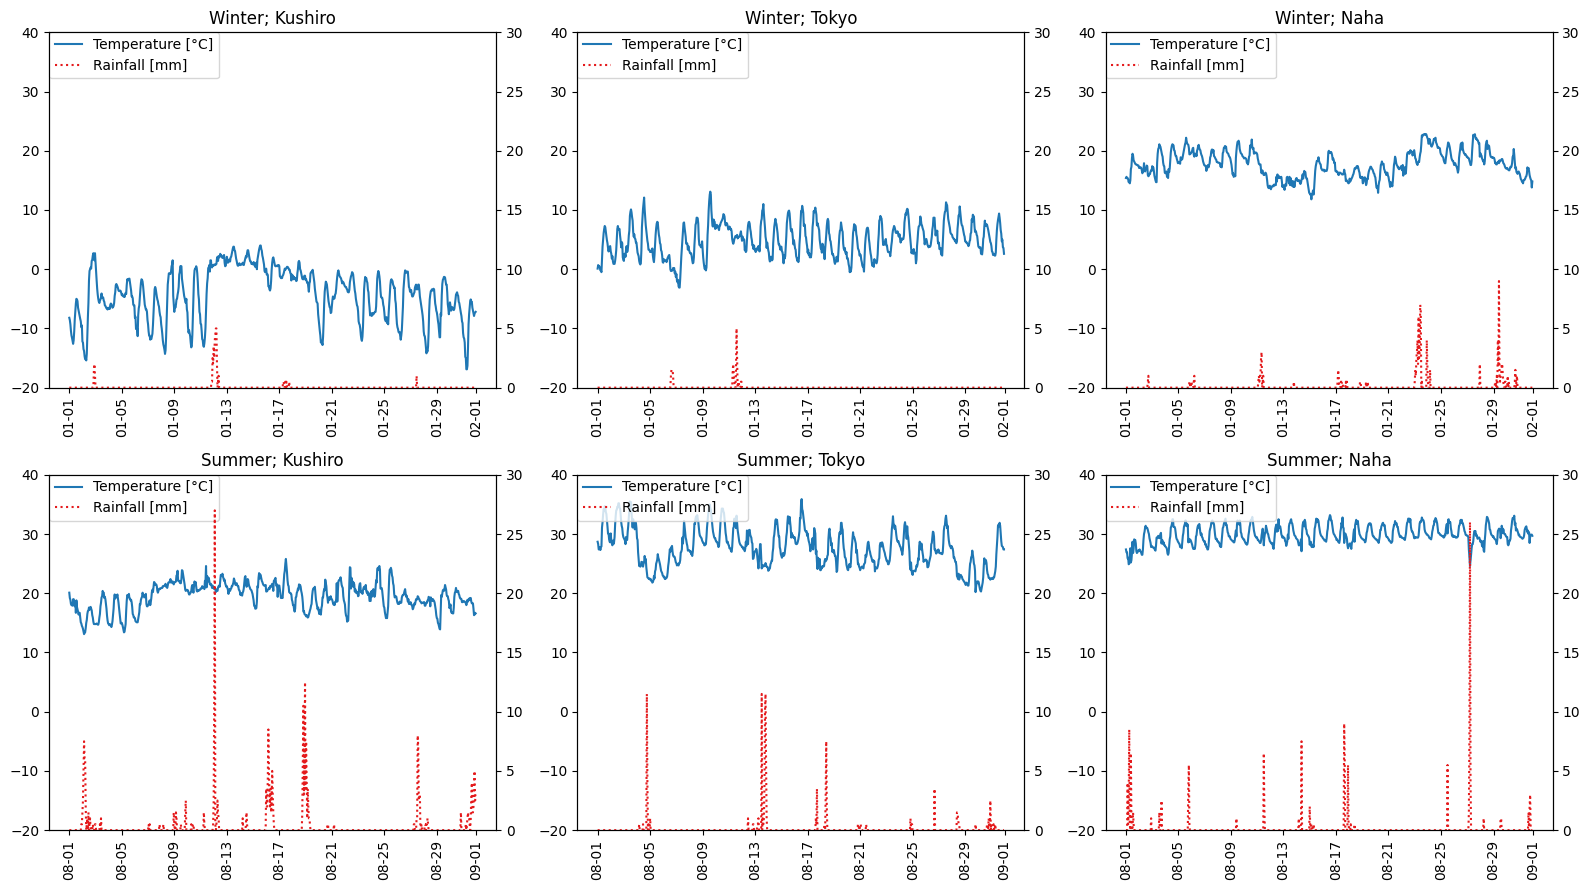

In [3]:
fig, axes = plt.subplots(nrows=len(DATA), ncols=len(DATA['Winter']), figsize=(16, 9), squeeze=False, tight_layout=True)

for i, season in enumerate(['Winter', 'Summer']):
    season_data = DATA[season]
    for j, season_loc_data in enumerate(season_data):
        #print(season_loc_data)
        file = season_loc_data['file']
        location = season_loc_data['location']

        df = pd.read_csv(file, index_col='timestamp', delimiter='\t')
        df.index = pd.to_datetime(df.index, format='%Y-%m-%dT%H:%M:%S.000+09:00')

        ax = axes[i, j]
        ax2 = ax.twinx()
        ax.plot(df.index.values, df['temperature [°C]'].values, label="Temperature [°C]")
        ax2.plot(df.index.values, df['rainfall [mm]'].values, label="Rainfall [mm]", linestyle='dotted', color=cm.Set1.colors[0])

        # legend
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1 + h2, l1 + l2, loc=2, borderaxespad=0.)

        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
        ax.set_title(f'{season}; {location}')
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_ylim(-20, 40)
        ax2.set_ylim(0, 30)

In [4]:
# fig.savefig("visualize.svg")

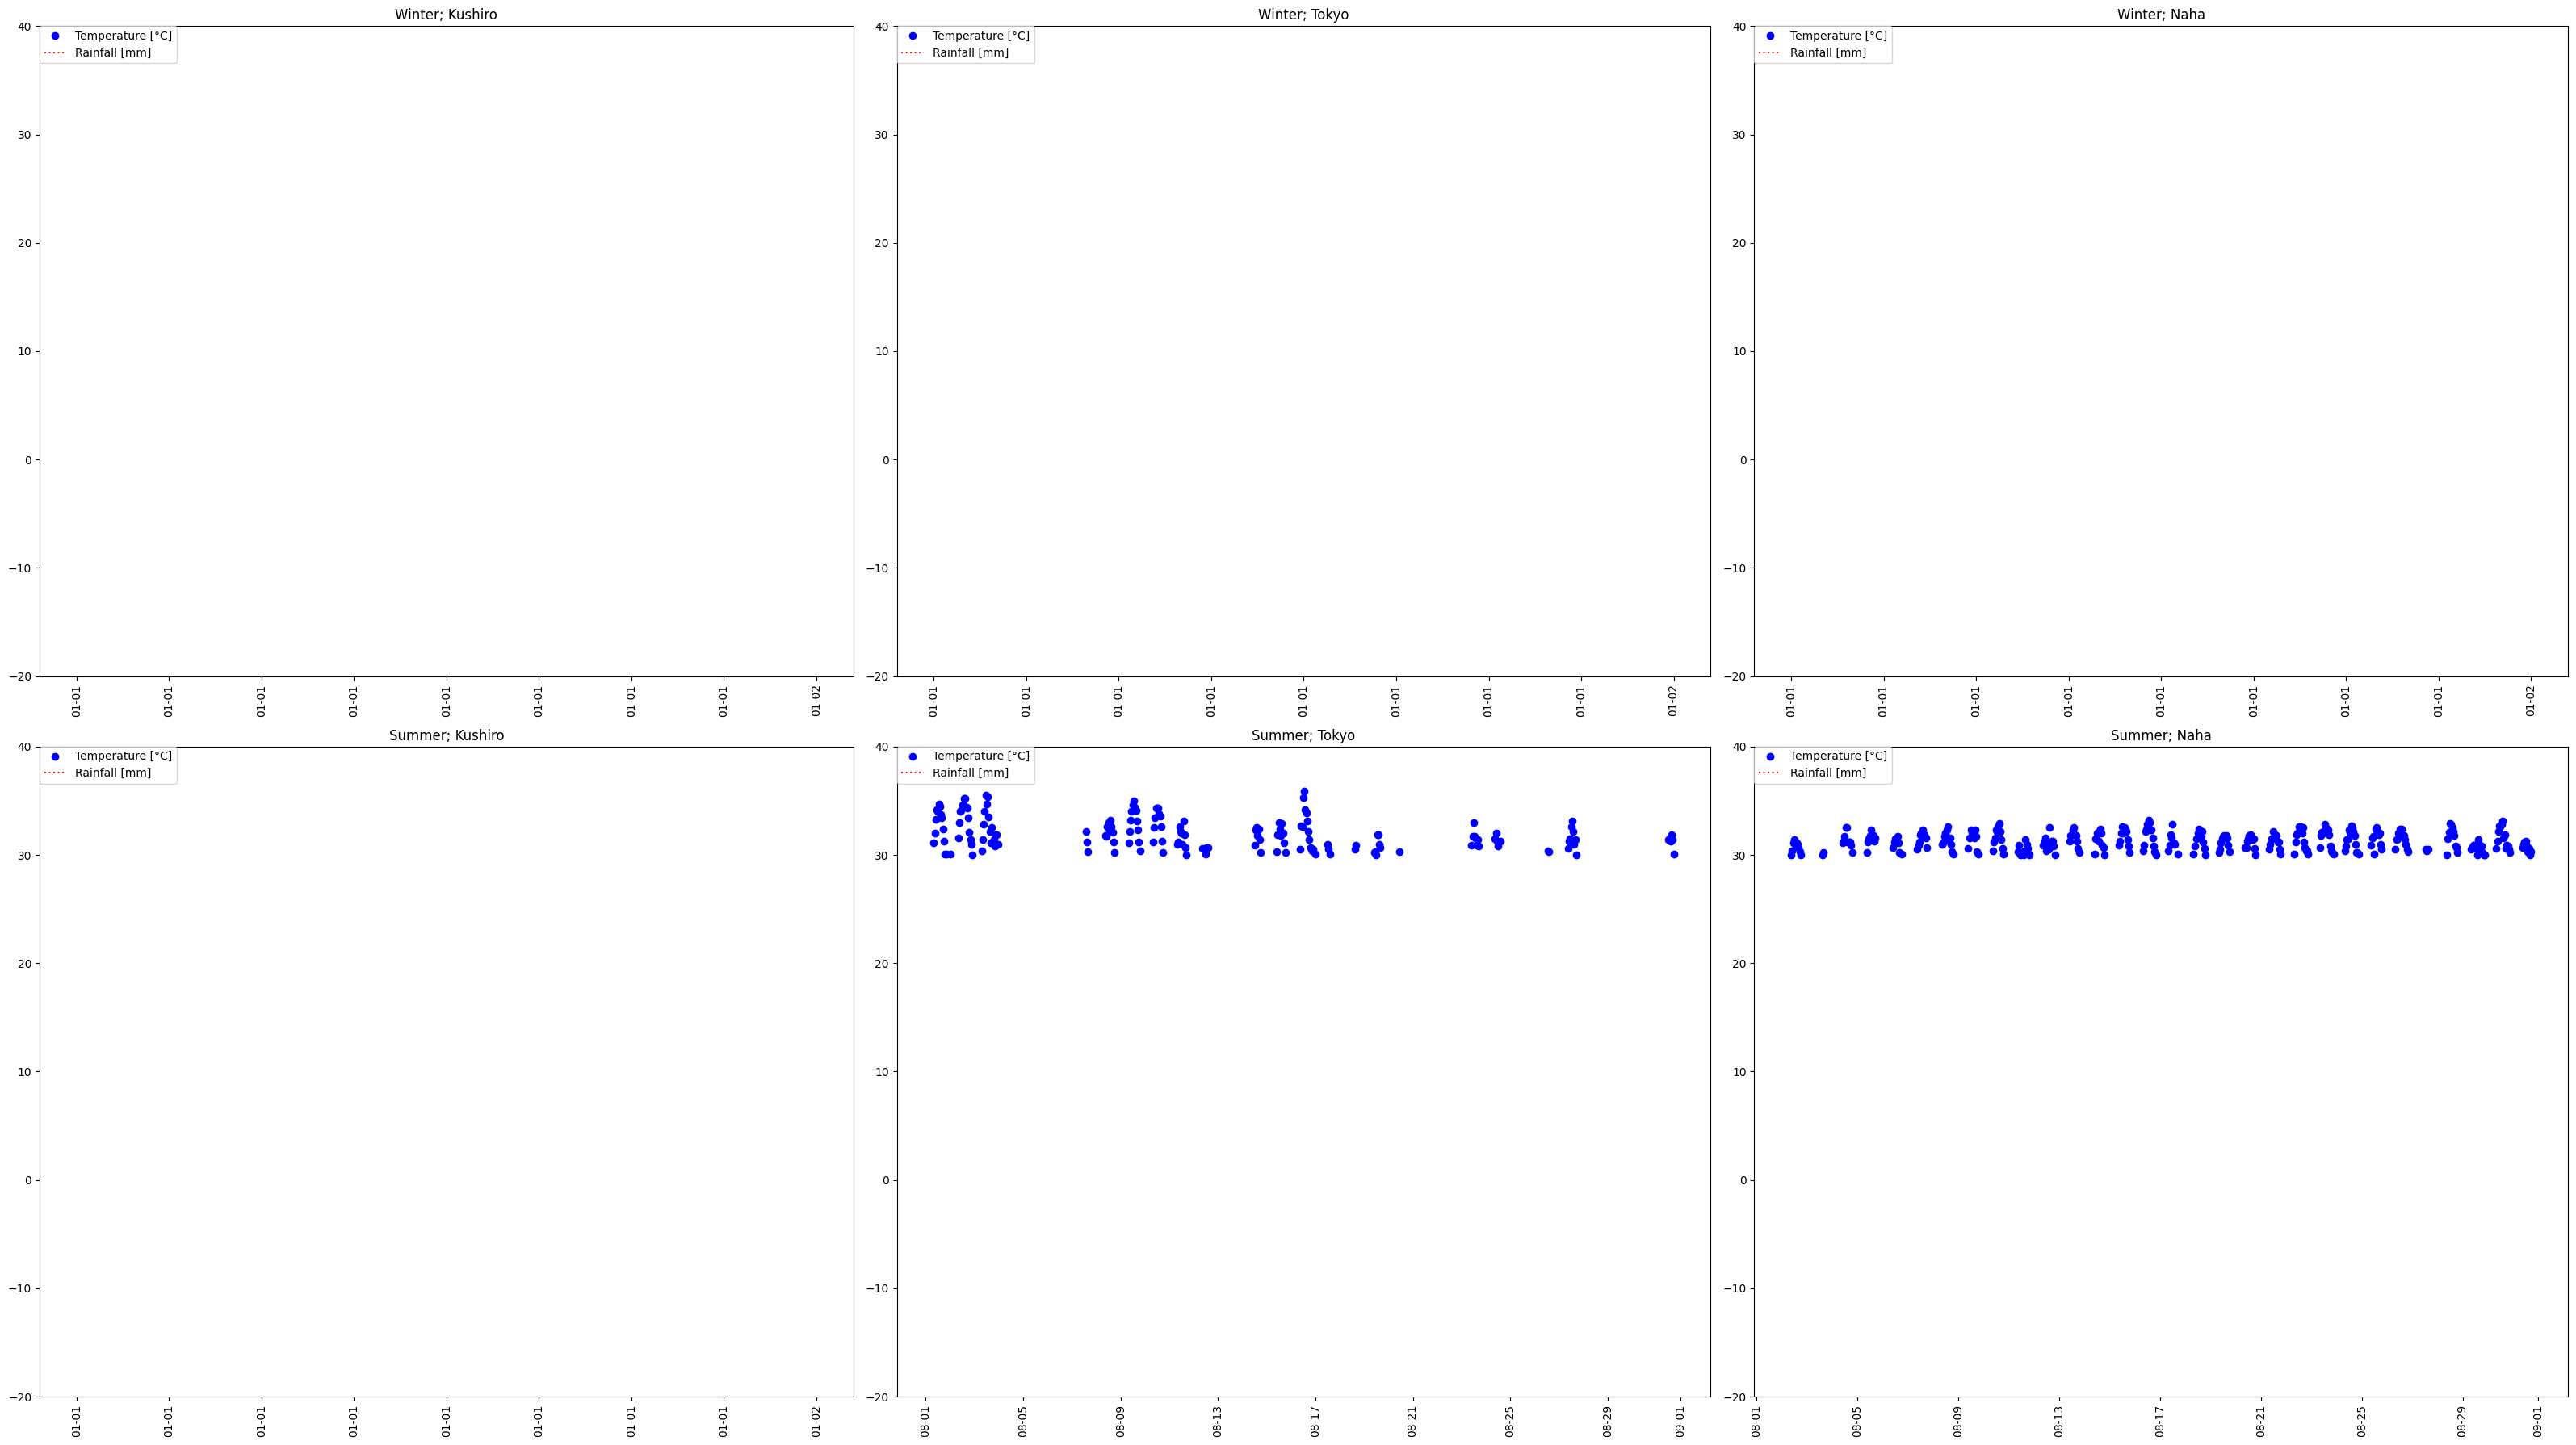

In [5]:
fig, axes = plt.subplots(nrows=len(DATA), ncols=len(DATA['Winter']), figsize=(32, 18), squeeze=False, tight_layout=True)

for i, season in enumerate(['Winter', 'Summer']):
    season_data = DATA[season]
    for j, season_loc_data in enumerate(season_data):
        #print(season_loc_data)
        file = season_loc_data['file']
        location = season_loc_data['location']

        df = pd.read_csv(file, index_col='timestamp', delimiter='\t')
        df.index = pd.to_datetime(df.index, format='%Y-%m-%dT%H:%M:%S.000+09:00')
        df = df[df['temperature [°C]'] >= 30.0]

        ax = axes[i, j]
        ax.plot(df.index.values, df['temperature [°C]'].values, 'bo', label="Temperature [°C]")

        # legend
        h1, l1 = ax.get_legend_handles_labels()
        ax.legend(h1 + h2, l1 + l2, loc=2, borderaxespad=0.)

        ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
        ax.set_title(f'{season}; {location}')
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_ylim(-20, 40)
